/var/folders/4s/j3khqjy96wj5f_dkqk0kf9pw0000gn/T/ipykernel_60575/1286265012.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


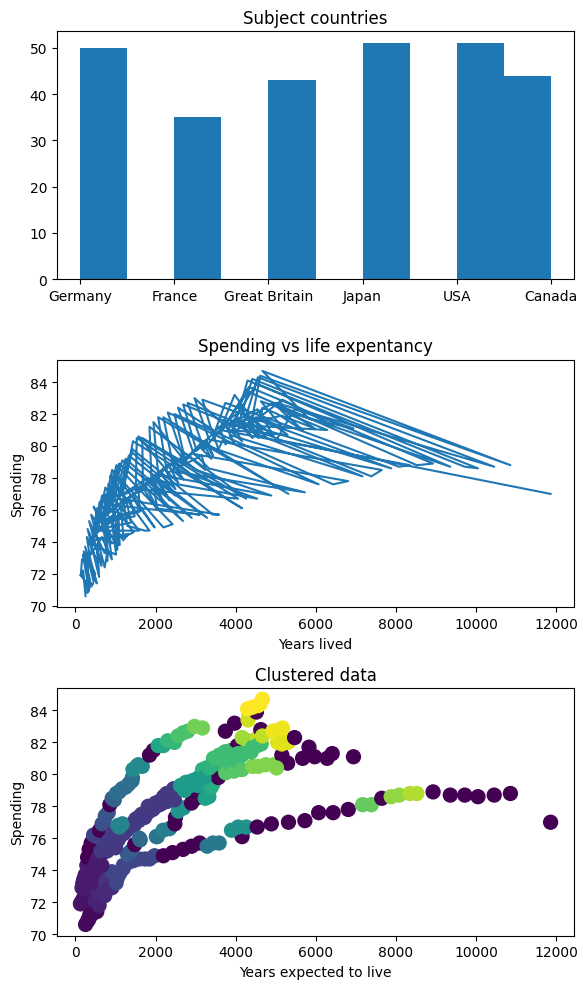

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas

health_exp_data = pandas.read_csv("./healthexp.csv");

# phase 2: preprosessing data
health_exp_data = health_exp_data.dropna().drop_duplicates()

# phase 1: data exploration
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 10))

ax1.hist(health_exp_data['Country'])
ax1.set_title("Subject countries")

sorted_data = health_exp_data.sort_values(by="Year")
ax2.plot(sorted_data["Spending_USD"],sorted_data["Life_Expectancy"])
ax2.set_title("Spending vs life expentancy")
ax2.set_ylabel("Spending")
ax2.set_xlabel("Years lived")


# Phase 3 & 4: Data Analisys and clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(health_exp_data[["Spending_USD", "Life_Expectancy"]])

dbscan = DBSCAN(eps=0.1, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_data)

health_exp_data["cluster"] = dbscan_labels

ax3.scatter(health_exp_data["Spending_USD"],health_exp_data["Life_Expectancy"], c=health_exp_data["cluster"], cmap='viridis', s=100)
ax3.set_title("Clustered data")
ax3.set_ylabel("Spending")
ax3.set_xlabel("Years expected to live")

plt.tight_layout()
fig.show()